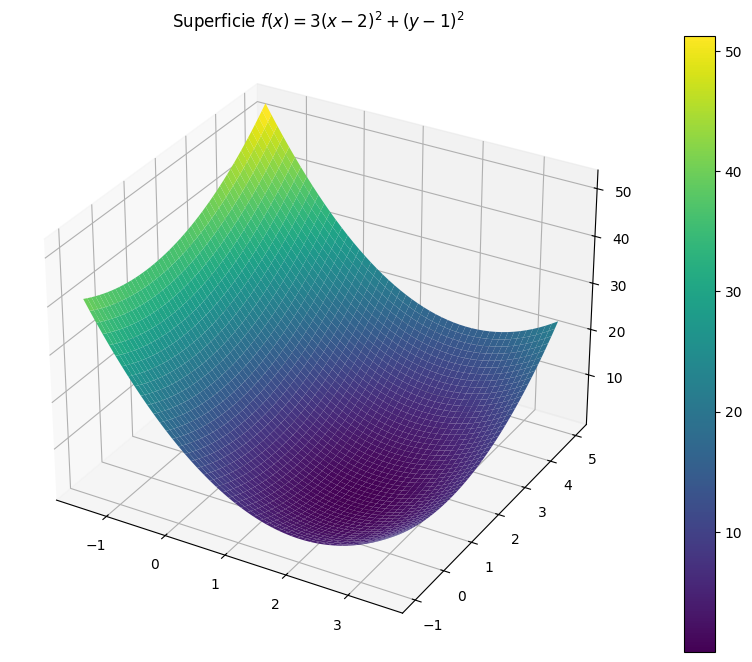

Passo fisso
x = (2.000000, 1.000005)
Iterazioni: 3392

Backtracking
x = (2.000001, 1.000004)
Iterazioni: 20


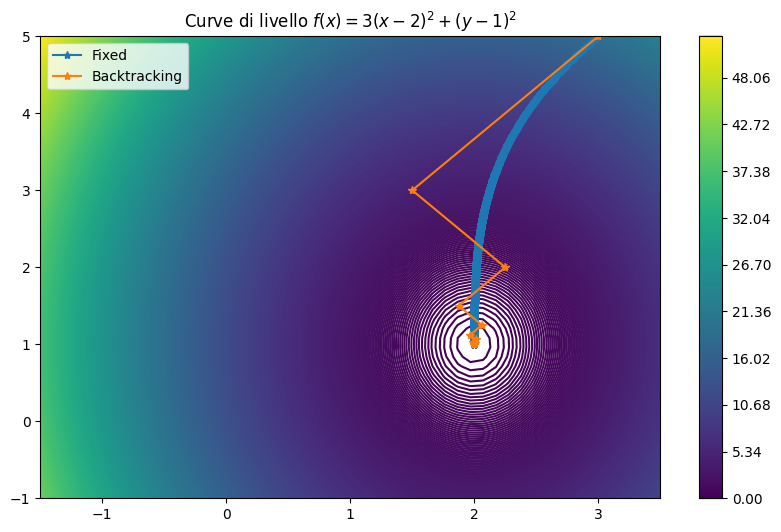

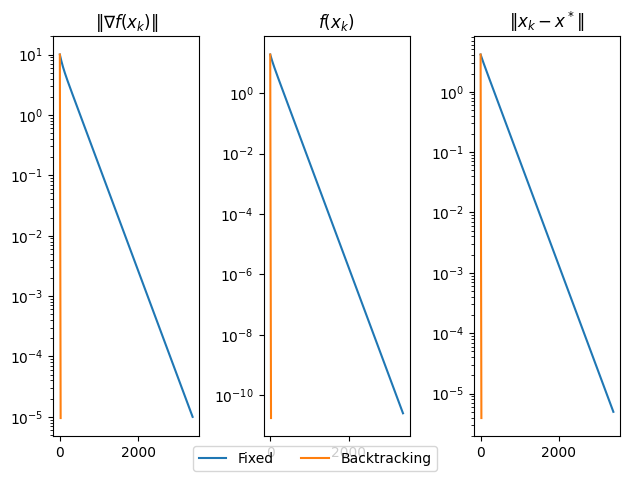

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Domanda 11

# metodo di discesa del gradiente
def minimize(f, gradf, x0, step, maxit, toll, xstar, fixed = True):
  xList = np.zeros((2, maxit + 1))
  normGradList = np.zeros(maxit + 1)
  fEvalList = np.zeros(maxit + 1)
  errList = np.zeros(maxit + 1)

  xLast = x0
  xList[:,0] = xLast
  k = 0
  normGradList[k] = np.linalg.norm(gradf(xLast), 2)
  fEvalList[k] = f(xLast)
  errList[k] = np.linalg.norm(xLast - xstar, 2)

  while (np.linalg.norm(gradf(xLast)) > toll and k < maxit):
    k = k + 1
    grad = gradf(xLast)
    
    if not fixed:
      step = backtracking(xLast, f, grad)
    
    if (step == -1):
      print("Non convergente")
      return k

    xLast = xLast - step*grad
    xList[:,k] = xLast
    normGradList[k] = np.linalg.norm(gradf(xLast), 2)
    fEvalList[k] = f(xLast)
    errList[k] = np.linalg.norm(xLast - xstar, 2)
  
  print("x = (%f, %f)"%(xList[0,k], xList[1,k]))
  print("Iterazioni:", k)

  return (xLast, normGradList[:k+1], fEvalList[:k+1], errList[:k+1], xList[:,:k], k)

def backtracking(x, f, grad):
  alpha = 1
  rho = 0.5
  c1 = 0.25 
  p = -grad
  j = 0
  jmax = 10
  while ((f(x + alpha*p) > f(x) + c1*alpha*np.dot(grad, p)) and j < jmax):
    alpha = rho*alpha
    j = j + 1
  if (j > jmax):
    return -1
  else:
    return alpha


def f(vec):
  x, y = vec
  eval = 3*(x - 2)**2 + (y - 1)**2
  return eval

def gradf(vec):
  x, y = vec
  dfdx = 6*(x - 2)
  dfdy = 2*(y - 1)
  return np.array((dfdx, dfdy))

x = np.linspace(-1.5, 3.5)
y = np.linspace(-1, 5)
X, Y = np.meshgrid(x, y)
vec = np.array((X, Y))
Z = f(vec)

# plottare la superficie
fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection="3d")
ax.set_title("Superficie $f(x) = 3(x-2)^2 + (y-1)^2$")
s = ax.plot_surface(X, Y, Z, cmap="viridis")
fig.colorbar(s)
plt.show()

# plottare le curve di livello
fig = plt.figure(figsize=(10, 6))
contours = plt.contour(X, Y, Z, levels=1000)
plt.title("Curve di livello $f(x) = 3(x-2)^2 + (y-1)^2$")
fig.colorbar(contours)

# determinare punto di minimo
fixedStep = 0.002
maxit = 10000
toll = 1.e-5
x0 = np.array((3, 5))
xstar = np.array((2, 1))

print("Passo fisso")
(xLast, normGradListF, fEvalListF, errListF, xList, k) = minimize(f, gradf, x0, fixedStep, maxit, toll, xstar, fixed=True)
plt.plot(xList[0,:], xList[1,:], '*-')
print("\nBacktracking")
(xLast, normGradList, fEvalList, errList, xList, k) = minimize(f, gradf, x0, fixedStep, maxit, toll, xstar, fixed=False)
plt.plot(xList[0,:], xList[1,:], '*-')
plt.legend(['Fixed', 'Backtracking'])
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.semilogy(normGradListF)
ax1.semilogy(normGradList)
ax1.set_title('$\|\\nabla f(x_k)\|$')
ax2.semilogy(fEvalListF)
ax2.semilogy(fEvalList)
ax2.set_title('$f(x_k)$')
ax3.semilogy(errListF)
ax3.semilogy(errList)
ax3.set_title('$\|x_k-x^*\|$')
fig.tight_layout()
fig.legend(['Fixed', 'Backtracking'], loc='lower center', ncol=4)
plt.show()


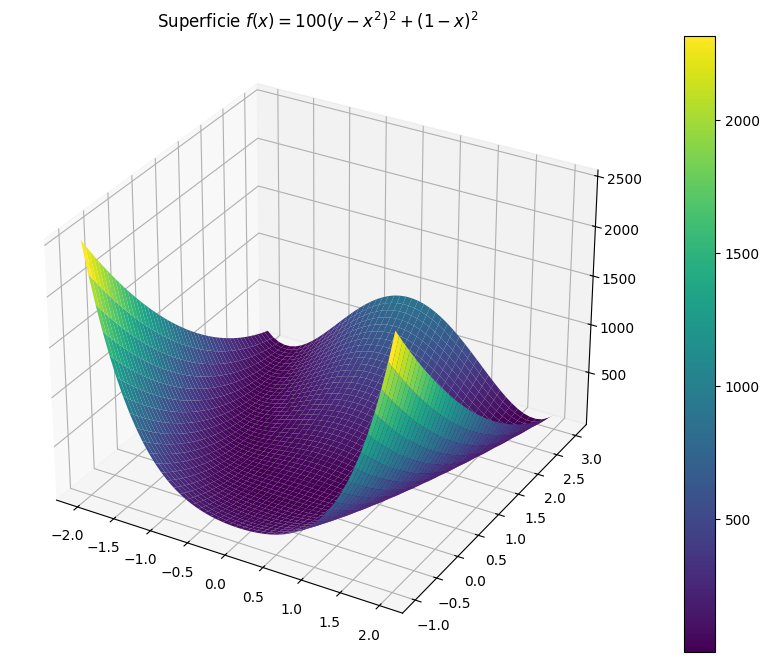

Passo fisso
x = (0.993006, 0.986033)
Iterazioni: 10000

Backtracking
x = (0.999989, 0.999978)
Iterazioni: 2173


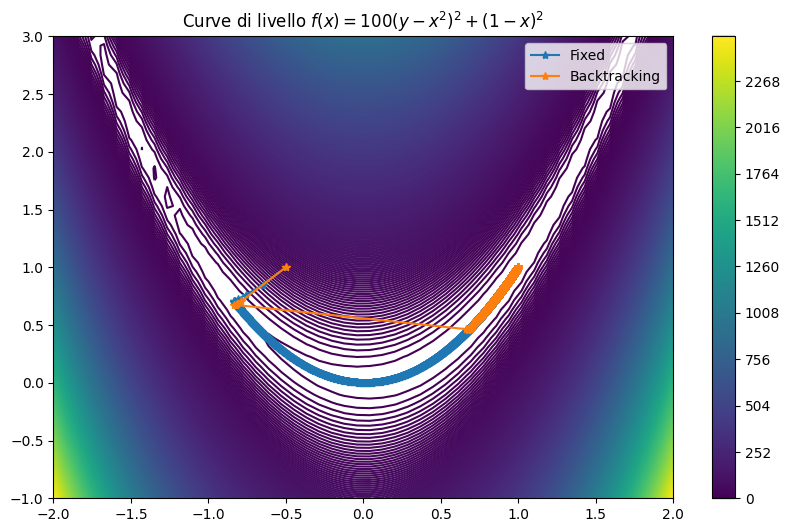

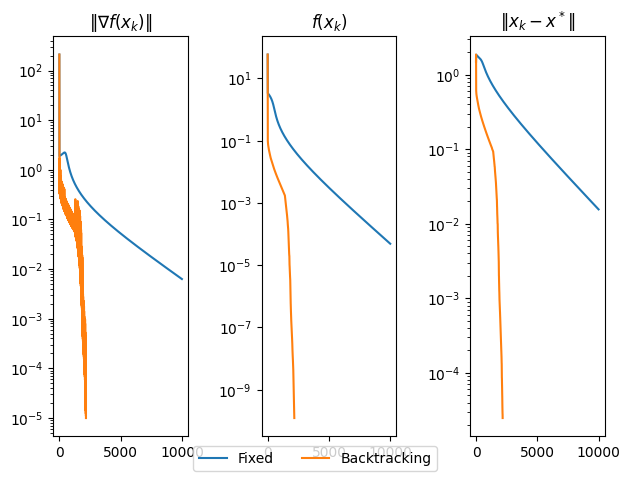

In [5]:

#Domanda 12 

# metodo di discesa del gradiente
def minimize(f, gradf, x0, step, maxit, toll, xstar, fixed = True):
  xList = np.zeros((2, maxit + 1))
  normGradList = np.zeros(maxit + 1)
  fEvalList = np.zeros(maxit + 1)
  errList = np.zeros(maxit + 1)

  xLast = x0
  xList[:,0] = xLast
  k = 0
  normGradList[k] = np.linalg.norm(gradf(xLast), 2)
  fEvalList[k] = f(xLast)
  errList[k] = np.linalg.norm(xLast - xstar, 2)

  while (np.linalg.norm(gradf(xLast)) > toll and k < maxit):
    k = k + 1
    grad = gradf(xLast)
    
    if not fixed:
      step = backtracking(xLast, f, grad)
    
    if (step == -1):
      print("Non convergente")
      return k

    xLast = xLast - step*grad
    xList[:,k] = xLast
    normGradList[k] = np.linalg.norm(gradf(xLast), 2)
    fEvalList[k] = f(xLast)
    errList[k] = np.linalg.norm(xLast - xstar, 2)
  
  print("x = (%f, %f)"%(xList[0,k], xList[1,k]))
  print("Iterazioni:", k)

  return (xLast, normGradList[:k+1], fEvalList[:k+1], errList[:k+1], xList[:,:k], k)

def backtracking(x, f, grad):
  alpha = 1
  rho = 0.5
  c1 = 0.25 
  p = -grad
  j = 0
  jmax = 10
  while ((f(x + alpha*p) > f(x) + c1*alpha*np.dot(grad, p)) and j < jmax):
    alpha = rho*alpha
    j = j + 1
  if (j > jmax):
    return -1
  else:
    return alpha

import matplotlib.pyplot as plt

def f(vec):
  x, y = vec
  eval = 100*(y - x**2)**2 + (1 - x)**2
  return eval

def gradf(vec):
  x, y = vec
  dfdx = -400*x*(y - x**2) - 2*(1 - x)
  dfdy = 200*(y - x**2)
  return np.array((dfdx, dfdy))

x = np.linspace(-2, 2)
y = np.linspace(-1, 3)
X, Y = np.meshgrid(x, y)
vec = np.array((X, Y))
Z = f(vec)

# plottare la superficie
fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection="3d")
ax.set_title("Superficie $f(x) = 100(y-x^2)^2 + (1-x)^2$")
s = ax.plot_surface(X, Y, Z, cmap="viridis")
fig.colorbar(s)
plt.show()

# plottare le curve di livello
fig = plt.figure(figsize=(10, 6))
contours = plt.contour(X, Y, Z, levels=1000)
plt.title("Curve di livello $f(x) = 100(y-x^2)^2 + (1-x)^2$")
fig.colorbar(contours)

# determinare punto di minimo
fixedStep = 0.001
maxit = 10000
toll = 1.e-5
x0 = np.array((-0.5, 1))
xstar = np.array((1, 1))

print("Passo fisso")
(xLast, normGradListF, fEvalListF, errListF, xList, k) = minimize(f, gradf, x0, fixedStep, maxit, toll, xstar, fixed=True)
plt.plot(xList[0,:], xList[1,:], '*-')
print("\nBacktracking")
(xLast, normGradList, fEvalList, errList, xList, k) = minimize(f, gradf, x0, fixedStep, maxit, toll, xstar, fixed=False)
plt.plot(xList[0,:], xList[1,:], '*-')
plt.legend(['Fixed', 'Backtracking'])
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.semilogy(normGradListF)
ax1.semilogy(normGradList)
ax1.set_title('$\|\\nabla f(x_k)\|$')
ax2.semilogy(fEvalListF)
ax2.semilogy(fEvalList)
ax2.set_title('$f(x_k)$')
ax3.semilogy(errListF)
ax3.semilogy(errList)
ax3.set_title('$\|x_k-x^*\|$')
fig.tight_layout()
fig.legend(['Fixed', 'Backtracking'], loc='lower center', ncol=4)
plt.show()
